#Support vector Regression(SVR)

##Load & Explore the Dataset

In [ ]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [ ]:
df.describe()


,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


##Features Scalling(Very IMP for SVR)

In [ ]:
from sklearn.preprocessing import StandardScaler

x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

##Flatten for SVR

In [ ]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [ ]:
y_scaled=y_scaled.ravel()

In [ ]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

##Train SVR Model(RBF Kernal)

In [ ]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_scaled,y_scaled)


SVR()

##Prediction & inverse Scaling

In [ ]:
y_pred_scaled=svr.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [ ]:
y_pred_scaled

array([-0.44136901, -0.94824676,  1.21996727, ..., -0.69121786,
        1.10320547, -1.42223769])

In [ ]:
y_pred

array([[ 92030.51822044],
       [ 65276.37287393],
       [179719.57488156],
       ...,
       [ 78842.93496023],
       [173556.62504107],
       [ 40258.06831989]])

##Visualization: Actual vs Predicted

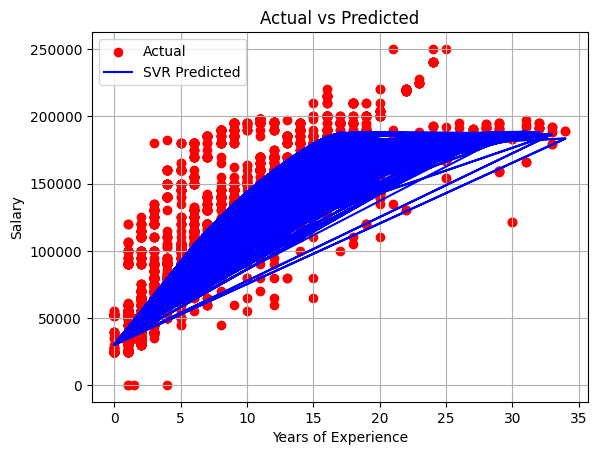

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='blue',label='SVR Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

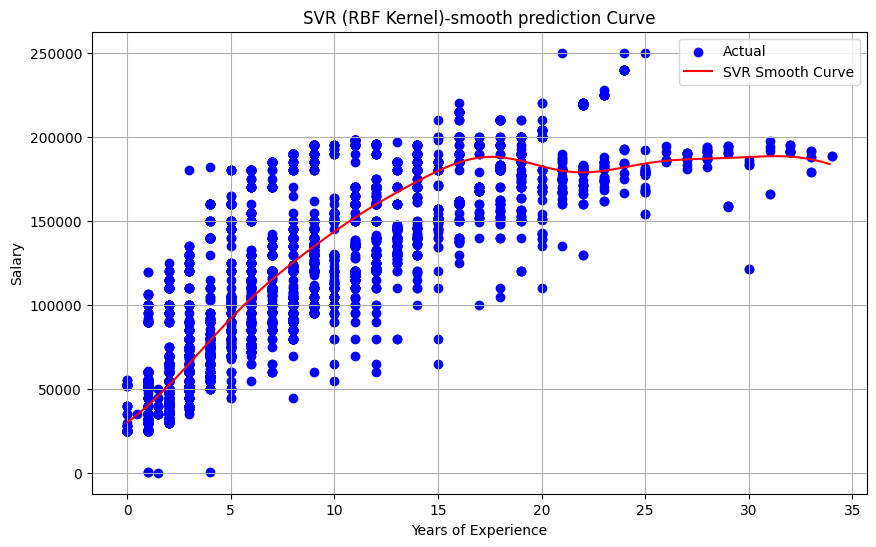

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#create a file grid between min & max YearsExpeience
x_grid=np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid=x_grid.reshape(-1,1)

#Scale x_grid just like training data
x_grid_scaled=sc_x.transform(x_grid)

#Predict on the grid and inverse transform the results
y_grid_scaled=svr.predict(x_grid_scaled)
y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#plot
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x_grid,y_grid,color='red',label='SVR Smooth Curve',linestyle='-')
plt.title('SVR (RBF Kernel)-smooth prediction Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

##Evaluate Model Performance

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)

print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MSE: 766339401.3394145
RMSE: 27682.83586158424
R2 Score: 0.7249285879306625


##Compare kernels Using Code

kerne: LINEAR, R2_Score: 0.6326


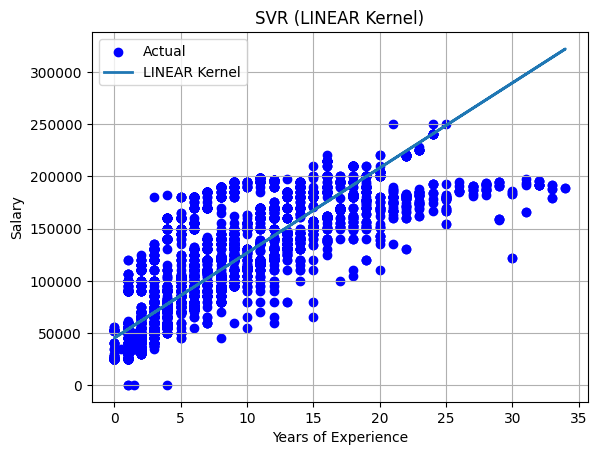

kerne: POLY, R2_Score: 0.0578


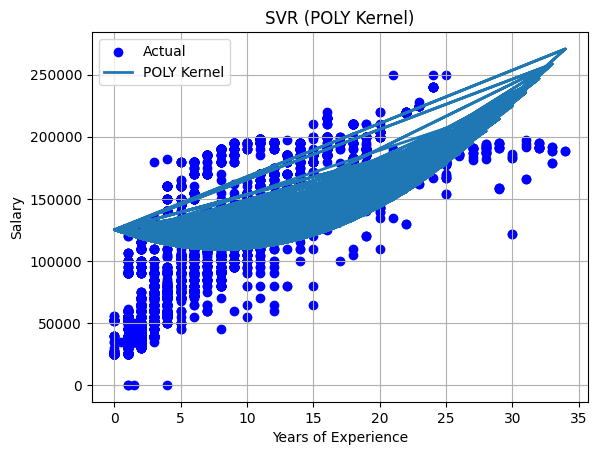

kerne: RBF, R2_Score: 0.7249


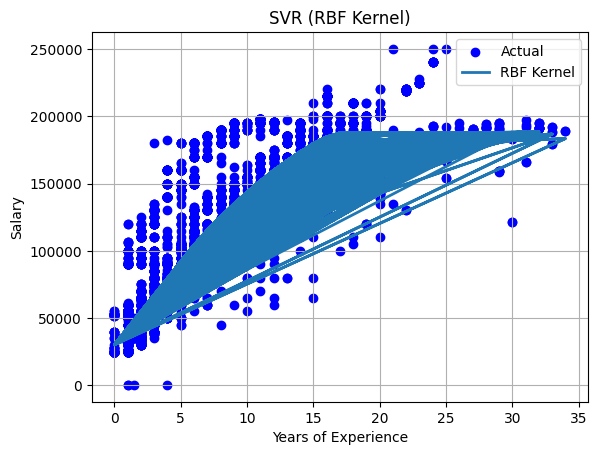

In [45]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#1.Load anda scale data
x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y).ravel()  #flatten y

#2. Defines kernels
kernels=['linear','poly','rbf']

#3. Train and evaluate each kernel
for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
  else:
    model=SVR(kernel=kernel)

  model.fit(x_scaled,y_scaled)

  #Predict for training data
  y_pred_scaled=model.predict(x_scaled)
  y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

  #Evaluate
  score=r2_score(y,y_pred)
  print(f"kerne: {kernel.upper()}, R2_Score: {score:.4f}")

  #Plot (optional)
  plt.scatter(x,y,color='blue',label='Actual')
  plt.plot(x,y_pred,label=f'{kernel.upper()} Kernel',linewidth=2)
  plt.title(f'SVR ({kernel.upper()} Kernel)')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()

##Tri different C & epilon Values

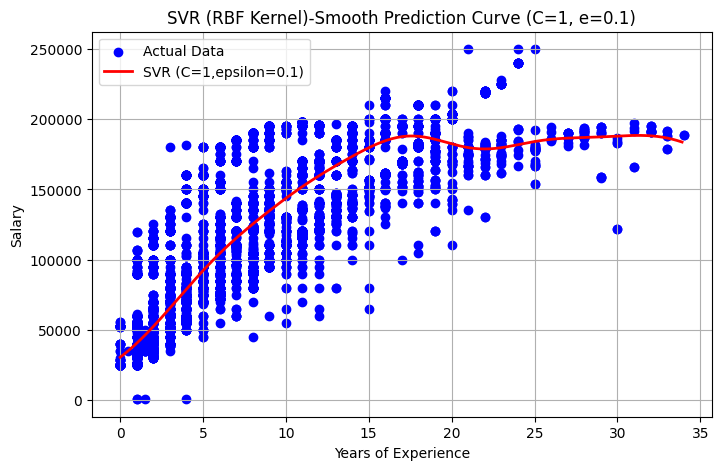

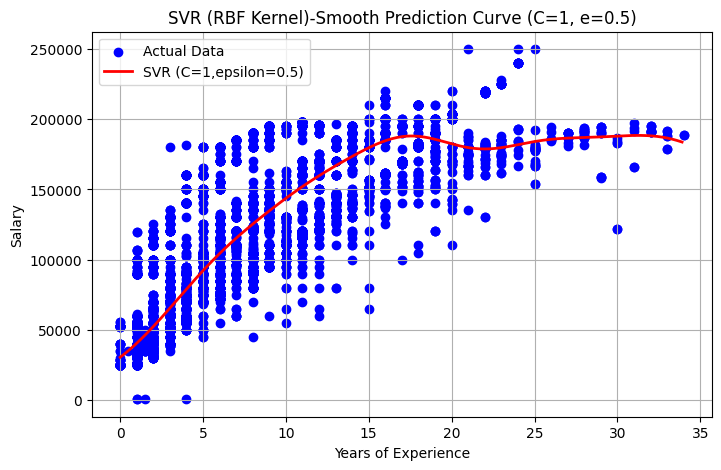

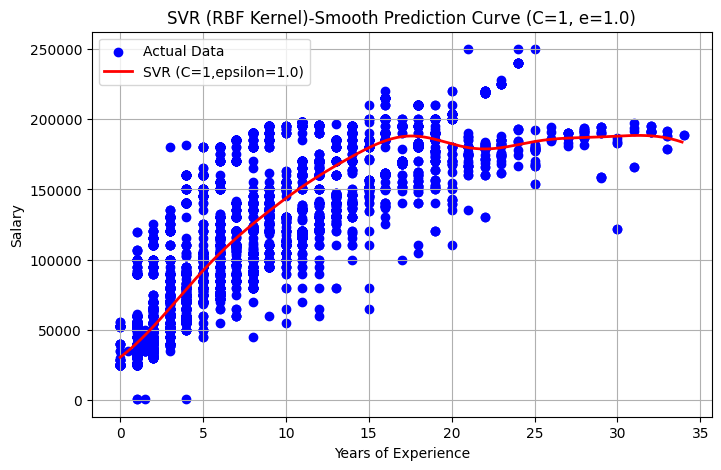

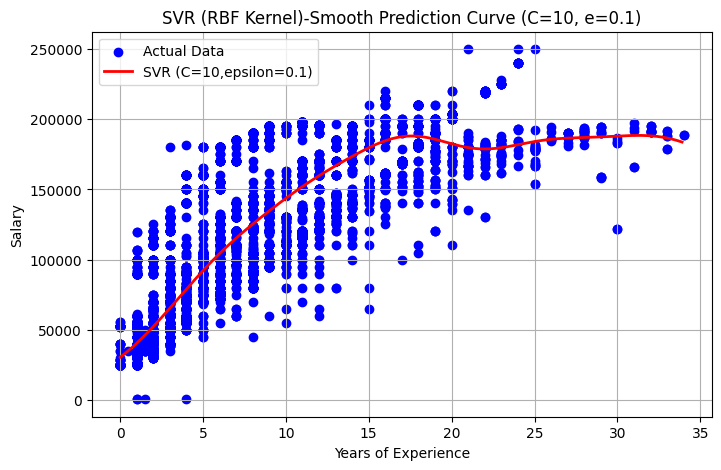

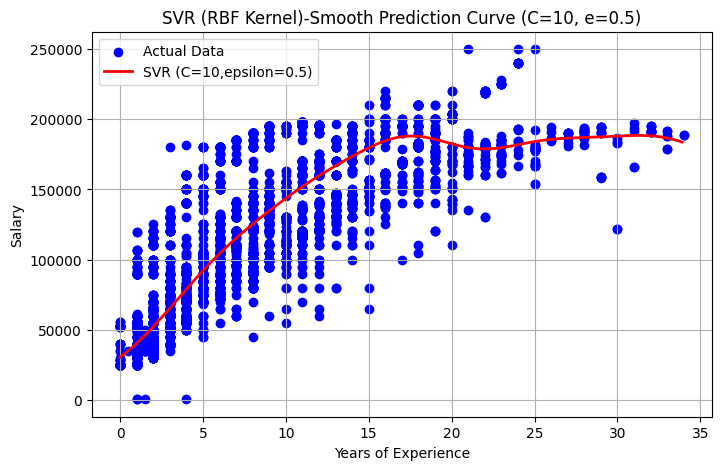

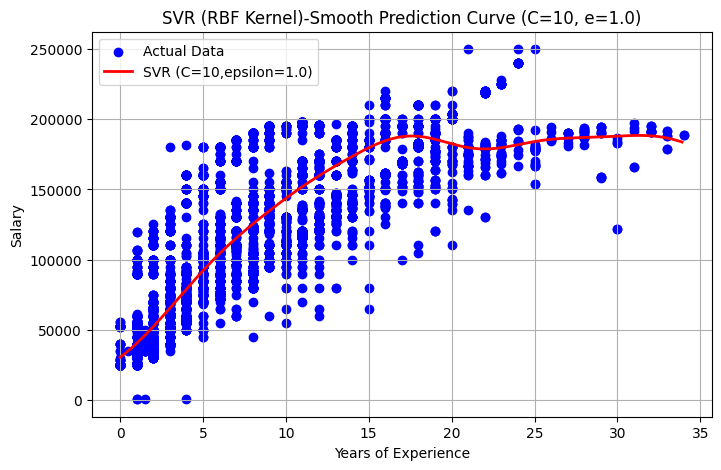

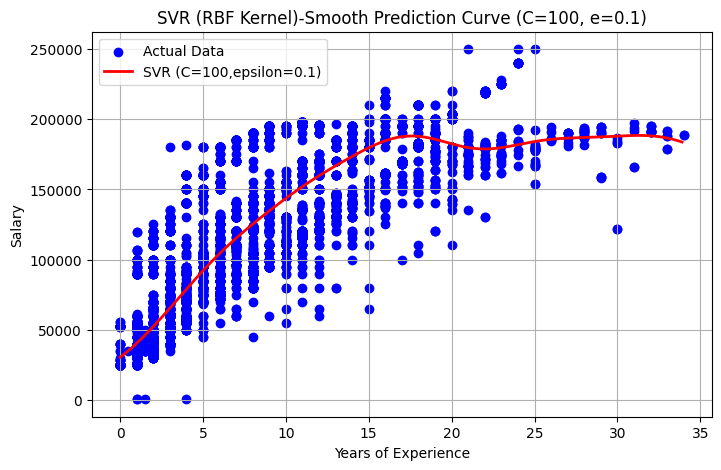

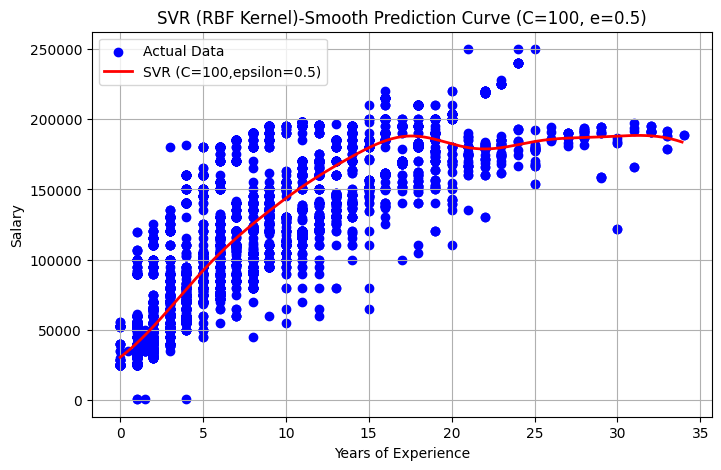

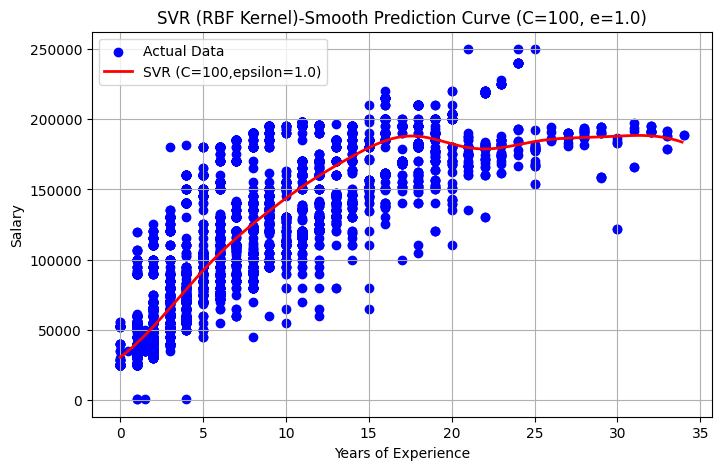

In [53]:
C_values=[1,10,100]
epsilon_values=[0.1,0.5,1.0]

x_grid=np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid=x_grid.reshape(-1,1)

x_grid_scaled=sc_x.transform(x_grid)

for C in C_values:
  for eps in epsilon_values:
    svr=SVR(kernel='rbf',C=C,epsilon=eps)
    svr.fit(x_scaled,y_scaled)

    y_grid_scaled=model.predict(x_grid_scaled)
    y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

    plt.figure(figsize=(8,5))
    plt.scatter(x,y,color='blue',label='Actual Data')
    plt.plot(x_grid,y_grid,color='red',label=f'SVR (C={C},epsilon={eps})',linewidth=2)
    plt.title(f'SVR (RBF Kernel)-Smooth Prediction Curve (C={C}, e={eps})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()
    plt.show()